In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import time
import pandas_datareader as pdr
import keras
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow import keras 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AMAN1011011/Stock_Forecasting_project/main/DATA.api/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
1,2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
2,2022-01-14,517.599976,538.369995,511.880005,525.690002,525.690002,7861100
3,2022-01-18,520.080017,521.750000,508.679993,510.799988,510.799988,4839100
4,2022-01-19,515.000000,523.210022,510.510010,515.859985,515.859985,4353500


In [3]:
df.shape

(251, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [7]:
df["Date"].min(), df["Date"].max()

(Timestamp('2022-01-12 00:00:00'), Timestamp('2023-01-11 00:00:00'))

In [8]:
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
2022-01-14,517.599976,538.369995,511.880005,525.690002,525.690002,7861100
2022-01-18,520.080017,521.750000,508.679993,510.799988,510.799988,4839100
2022-01-19,515.000000,523.210022,510.510010,515.859985,515.859985,4353500


Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

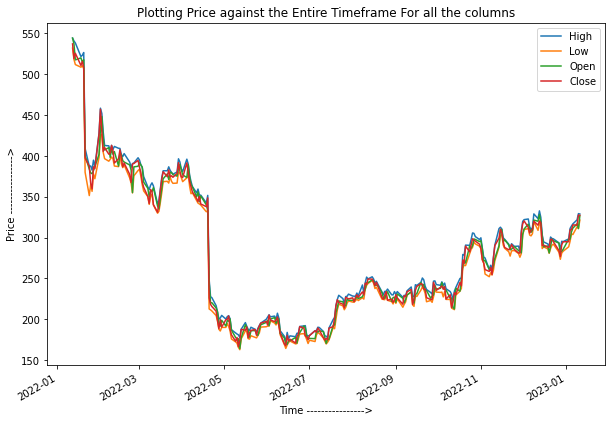

In [9]:
df[["High", "Low", "Open", "Close"]].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For HIGH column')

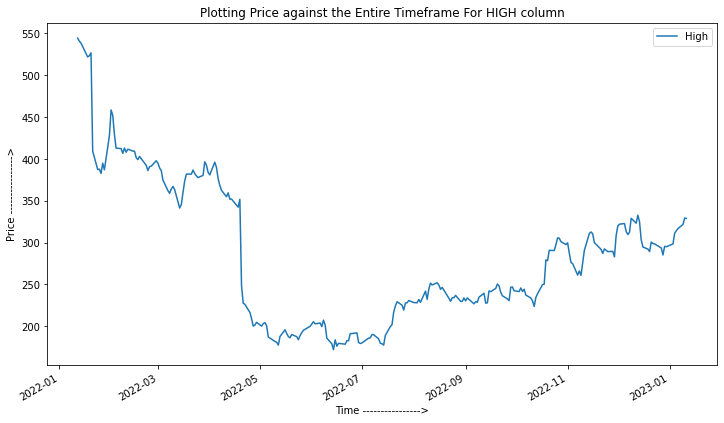

In [10]:
plt.figure(figsize=(12,7))
df["High"].plot()
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For HIGH column")

In [11]:
new_df = pd.DataFrame(df["High"].copy(), columns=["High"])
new_df.head()

,High
Date,
2022-01-12,544.270020
2022-01-13,540.789978
2022-01-14,538.369995
2022-01-18,521.750000
2022-01-19,523.210022


In [12]:
train_size = int(len(new_df)*0.8)

train = new_df.iloc[0:train_size]
test = new_df.iloc[train_size:len(new_df)]

In [13]:
len(train), len(test)

(200, 51)

In [14]:
def create_dataset(X, y, lag=1):
    xs,ys = [], []
    
    for i in range(len(X) - lag):
        tmp = X.iloc[i: i+lag].values
        xs.append(tmp)
        ys.append(y.iloc[i+lag])
    
    return np.array(xs), np.array(ys)

In [15]:
xtrain, ytrain = create_dataset(train, train["High"],10)
xtest, ytest = create_dataset(test, test["High"],10)

In [16]:
xtrain[0]

array([[544.27002 ],
       [540.789978],
       [538.369995],
       [521.75    ],
       [523.210022],
       [526.640015],
       [409.149994],
       [387.26001 ],
       [387.709991],
       [382.660004]])

In [17]:
ytrain[0]

394.799988

In [18]:
xtrain.shape

(190, 10, 1)

In [19]:
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(xtrain.shape[1], xtrain.shape[2])))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [20]:
model.fit(xtrain, ytrain,
         epochs=150,
         batch_size=150,
         verbose=1,
         shuffle=False
         )

Epoch 1/150
2/2 [==============================] - 2s 17ms/step - loss: 26144.8789
Epoch 2/150
2/2 [==============================] - 0s 9ms/step - loss: 14750.2725
Epoch 3/150
2/2 [==============================] - 0s 9ms/step - loss: 2803.5750
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 645.9047
Epoch 5/150
2/2 [==============================] - 0s 11ms/step - loss: 1276.4618
Epoch 6/150
2/2 [==============================] - 0s 11ms/step - loss: 1730.7281
Epoch 7/150
2/2 [==============================] - 0s 10ms/step - loss: 1917.6416
Epoch 8/150
2/2 [==============================] - 0s 10ms/step - loss: 1702.9044
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 1241.3732
Epoch 10/150
2/2 [==============================] - 0s 11ms/step - loss: 813.7167
Epoch 11/150
2/2 [==============================] - 0s 9ms/step - loss: 632.7870
Epoch 12/150
2/2 [==============================] - 0s 11ms/step - loss: 565.1625
Epoch 13/150
2/2 [=

In [21]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Entire Timeframe')

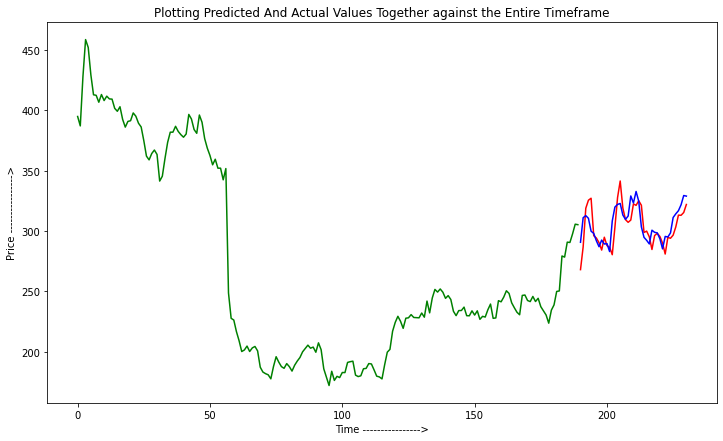

In [22]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(0, len(xtrain)), ytrain, 'g', label="history")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ypred, 'r', label="predictions")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ytest, 'b', label="Actual")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together against the Entire Timeframe")

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred,squared=False)

11.985547236106617

Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Testing Timeframe')

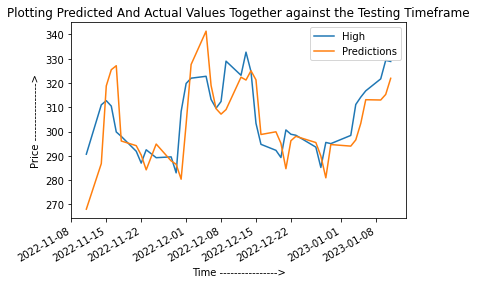

In [24]:
test = new_df.iloc[train_size+10:].copy()

test["Predictions"] = ypred
test[["High", "Predictions"]].plot()
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together against the Testing Timeframe")

In [25]:
model = Sequential()
model.add(LSTM(100, activation='relu',
           input_shape=(10,1), 
           return_sequences=True))
model.add(Dropout(0.2))

# hidden layer 2
model.add(LSTM(100,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [26]:
model.fit(xtrain,ytrain,epochs=300,batch_size=30,verbose=1)

Epoch 1/300
7/7 [==============================] - 3s 18ms/step - loss: 35720.0781
Epoch 2/300
7/7 [==============================] - 0s 16ms/step - loss: 11631.3633
Epoch 3/300
7/7 [==============================] - 0s 18ms/step - loss: 8174.8540
Epoch 4/300
7/7 [==============================] - 0s 34ms/step - loss: 10845.7021
Epoch 5/300
7/7 [==============================] - 0s 35ms/step - loss: 6656.8027
Epoch 6/300
7/7 [==============================] - 0s 35ms/step - loss: 6892.4014
Epoch 7/300
7/7 [==============================] - 0s 35ms/step - loss: 4372.4004
Epoch 8/300
7/7 [==============================] - 0s 28ms/step - loss: 4062.2815
Epoch 9/300
7/7 [==============================] - 0s 31ms/step - loss: 3262.3062
Epoch 10/300
7/7 [==============================] - 0s 32ms/step - loss: 3186.9548
Epoch 11/300
7/7 [==============================] - 0s 34ms/step - loss: 4293.8364
Epoch 12/300
7/7 [==============================] - 0s 43ms/step - loss: 3829.9204
Epoch 13/3

In [27]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 7ms/step


Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together')

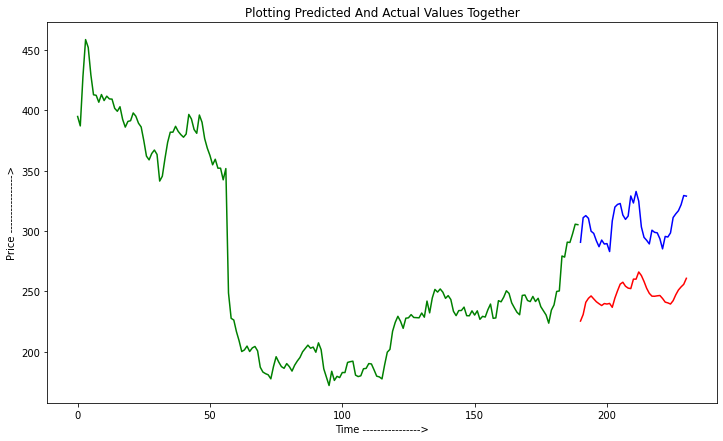

In [28]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(0, len(xtrain)), ytrain, 'g', label="history")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ypred, 'r', label="predictions")
plt.plot(np.arange(len(xtrain), len(xtrain) + len(xtest)), ytest, 'b', label="Actual")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together")

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred,squared=False)

59.5465909563182

Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together against the Testing Timeframe')

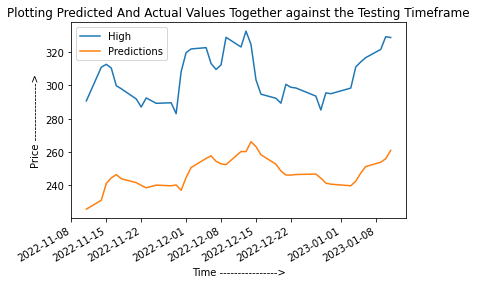

In [30]:
test = new_df.iloc[train_size+10:].copy()

test["Predictions"] = ypred
test[["High", "Predictions"]].plot()
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Predicted And Actual Values Together against the Testing Timeframe")